In [1]:
%pylab inline
# %matplotlib notebook
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)
import rawpy
import imageio

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = '../astrophotography_data/14mm_tests_2.8/DSC02155.ARW'

with rawpy.imread(path) as raw:
    print(raw.raw_image)
    rgb = raw.postprocess()
#     rgb = raw.postprocess(use_camera_wb=True)
    raw_image = raw.raw_image.copy()
print(rgb.shape)

[[520 540 520 ... 528 516 528]
 [536 528 544 ... 524 528 524]
 [516 536 524 ... 532 516 532]
 ...
 [568 544 564 ... 512 520 512]
 [536 560 532 ... 524 512 524]
 [548 536 548 ... 512 524 512]]
(2848, 4256, 3)


In [3]:
rgb[::,::,0].shape
red = rgb[::,::,0]
green = rgb[::,::,1]
blue = rgb[::,::,2]

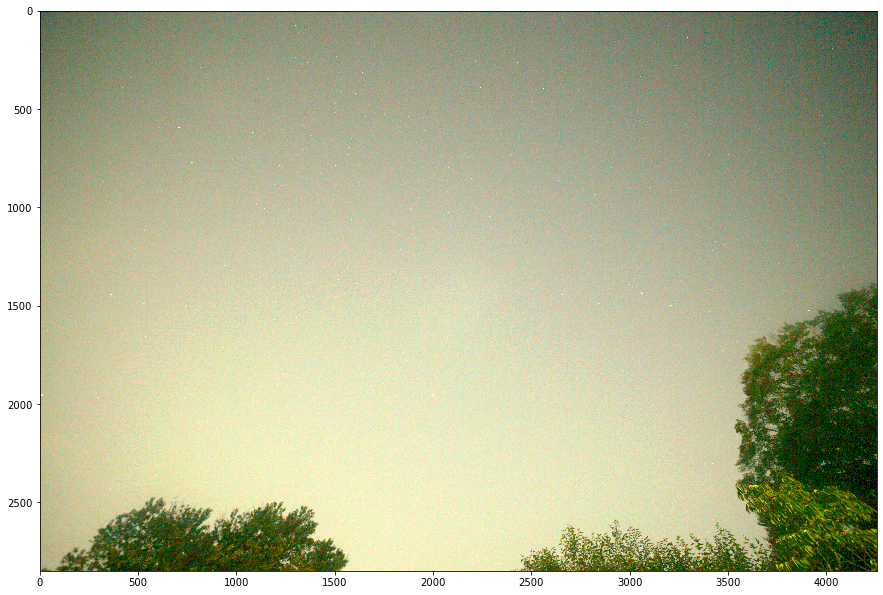

In [4]:
plt.figure(figsize=[15, 15])
plt.imshow(rgb)

Populating the interactive namespace from numpy and matplotlib


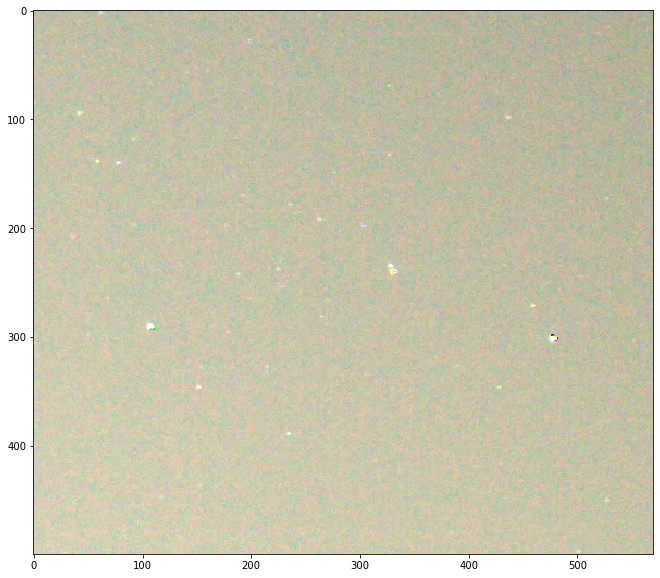

In [5]:
%pylab inline
plt.figure(figsize=[15,10])
plt.imshow(rgb[1200:1700,2730:3300],) # Y,X

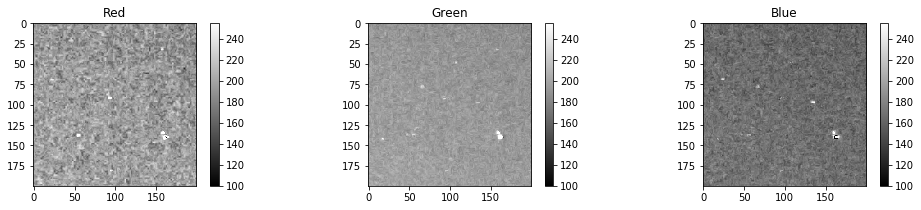

In [6]:
figsize(17, 3)
colors = ['Red','Green','Blue']

fig = plt.figure()
for color, i in zip([red, green, blue], range(0,3)):
    a = fig.add_subplot(1, 3, i+1)
    plt.imshow(color[1300:1500,2900:3100], aspect='equal',cmap='gray', vmin=100)
    plt.colorbar()
    a.set_title(colors[i])
    
plt.show()

In [7]:
# Makes a 3X3 plot with R,G,B for 3 stars. 
def plot_stars(s1, s2, s3):
    figsize(17, 17)
    fig = plt.figure()
    cmap = 'gist_heat'

    for color, i in zip([red, green, blue], range(0,3)):
 
        interval = MinMaxInterval()
        vmin1, vmax1 = interval.get_limits(color[s1])
        vmin2, vmax2 = interval.get_limits(color[s2])
        vmin3, vmax3 = interval.get_limits(color[s3])

        norm1 = ImageNormalize(vmin=vmin1, vmax=vmax1, stretch=SqrtStretch())
        norm2 = ImageNormalize(vmin=vmin2, vmax=vmax2, stretch=SqrtStretch())
        norm3 = ImageNormalize(vmin=vmin3, vmax=vmax3, stretch=SqrtStretch())

        print("Min.", colors[i], vmin1, vmin2, vmin3)
        print("Max.", colors[i], vmax1, vmax2, vmax3)

        a = fig.add_subplot(3, 3, i+1)
        plt.imshow(color[s1], aspect='equal',cmap=cmap, norm=norm1)
        plt.colorbar()
        a.set_title(colors[i])
        a = fig.add_subplot(3, 3, i+4)
        plt.imshow(color[s2], aspect='equal',cmap=cmap, norm=norm2)
        plt.colorbar()
        a = fig.add_subplot(3, 3, i+7)
        plt.imshow(color[s3], aspect='equal',cmap=cmap, norm=norm3)
        plt.colorbar()
    plt.show()

In [8]:
# These brighter stars are mostly saturated.
s1 = np.index_exp[1480:1500,2830:2850]
s2 = np.index_exp[1430:1450,3050:3070]
s3 = np.index_exp[1492:1512,3200:3220]

Min. Red 0 0 0
Max. Red 255 255 255
Min. Green 144 146 0
Max. Green 255 255 255
Min. Blue 0 0 0
Max. Blue 255 255 255


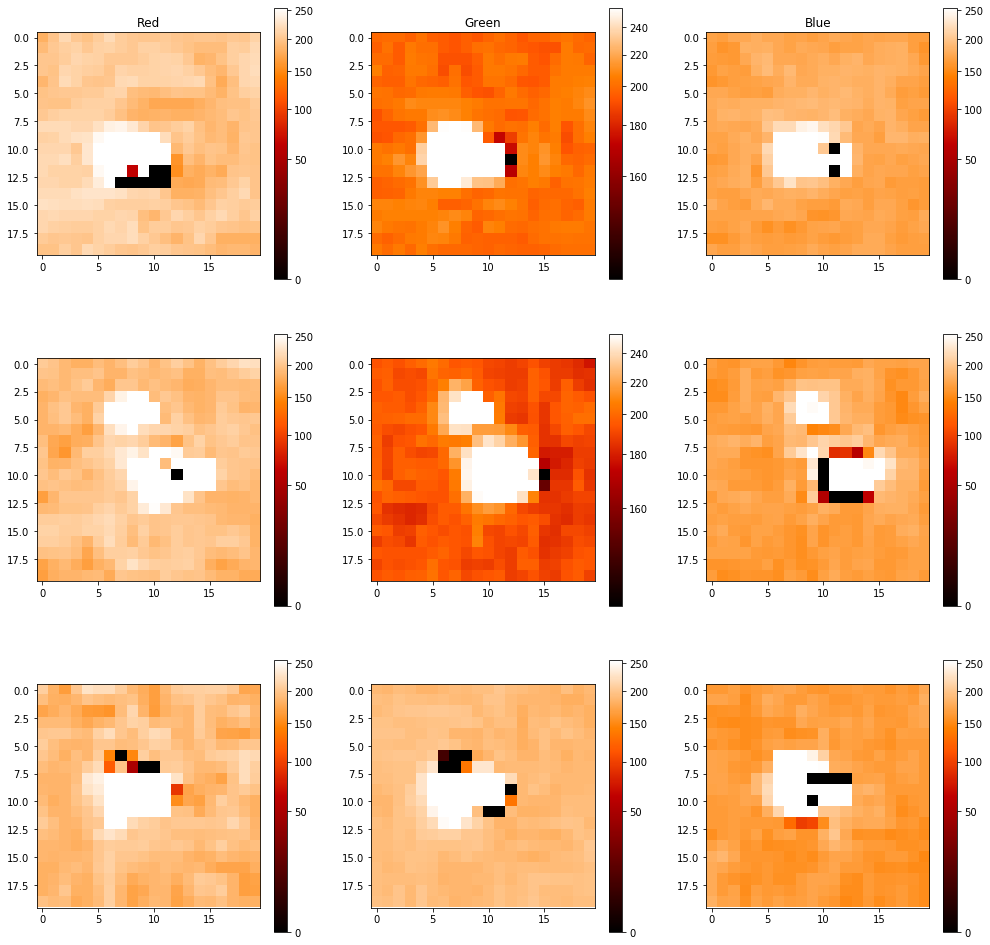

In [9]:
# plot brighter stars. This is good to visualize the PSF faint wings' extent.
plot_stars(s1, s2, s3)

In [10]:
# Lets try fainter ones. Use demosaic-exploreimage script to get a zoomable view of this file.
s1 = np.index_exp[1370:1390,2955:2975]
s2 = np.index_exp[1380:1400,2982:3002]
s3 = np.index_exp[1387:1407,3025:3045]

Min. Red 161 163 166
Max. Red 229 255 230
Min. Green 180 181 178
Max. Green 234 237 223
Min. Blue 140 131 143
Max. Blue 220 200 255


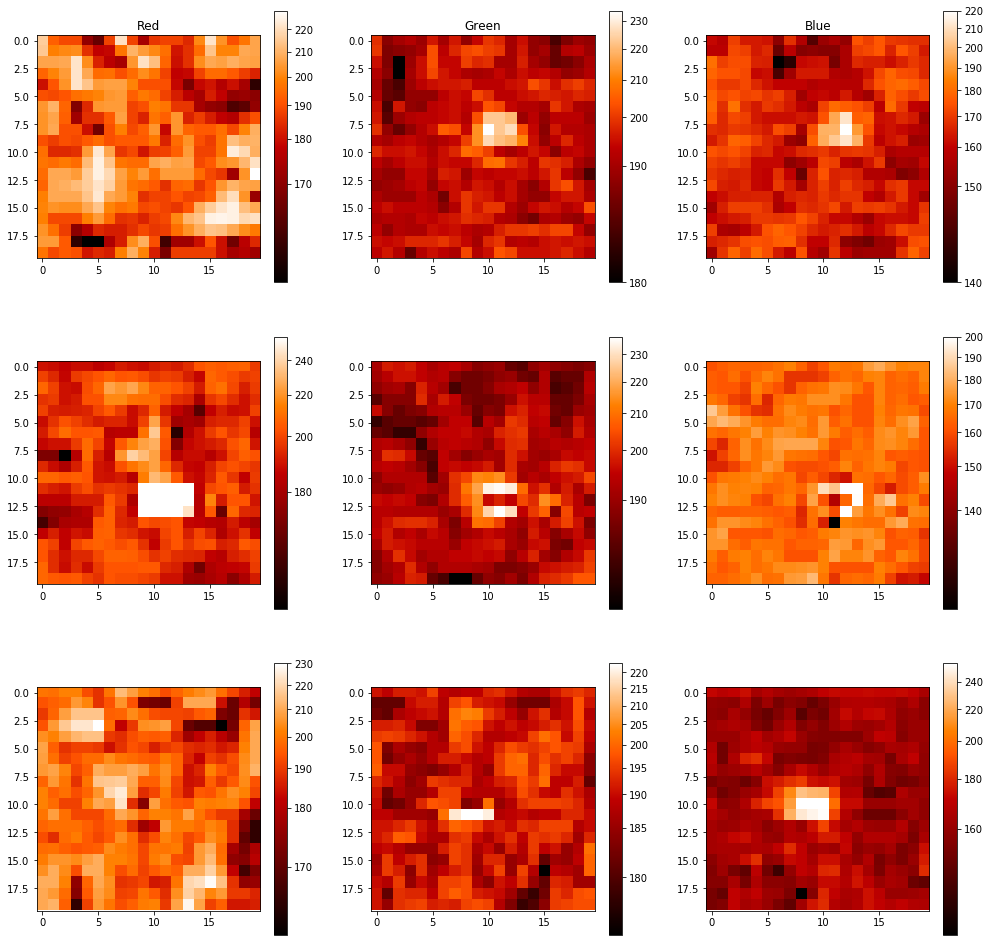

In [11]:
plot_stars(s1, s2, s3)

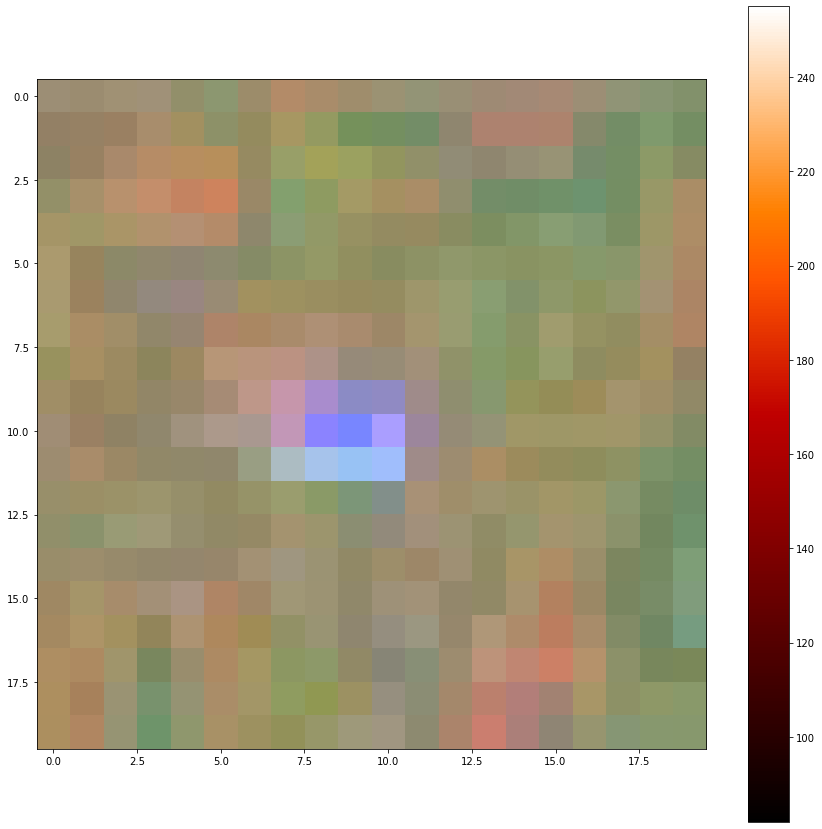

In [12]:
plt.figure(figsize=[15, 15])

with rawpy.imread(path) as raw:
#     rgb = raw.postprocess(gamma=(1,1), no_auto_bright=True, output_bps=16)
    rgb = raw.postprocess(gamma=(1,1))
    plt.imshow(rgb[s3], cmap='gist_heat')
    plt.colorbar()
